In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.utils import resample

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import all the algorithms
from umap import UMAP
from sklearn.manifold import TSNE
from openTSNE import TSNE as OpenTSNE
from MulticoreTSNE import MulticoreTSNE

import time
%matplotlib inline

In [2]:
sns.set(context='notebook',
        rc={'figure.figsize':(18,12)},
        palette=sns.color_palette('tab10', 10))

In [5]:
mnist_big = fetch_openml('mnist_784', version=1, return_X_y=True)
mnist_data_big = mnist_big[0]
mnist_labels_big = mnist_big[1].astype(int)

In [ ]:
mnist = load_digits()
mnist_data = mnist.data
mnist_labels = mnist.target

In [9]:
"""
    This class will allow a fast comparison between t-SNE and UMAP based on different versions for SPEED. This is a SPEED only metric,
    we will demonstrate some key initializations as to put both methods on an even playing field in terms of quality of data visualization
    and clustering. However, the key element here is speed and therefore may not be representative of `the best version.' For example UMAP seems
    a bit more out of the box than t-SNE in the sense that less has to be changed in order to have an excellent visual performance. Whereas whilst
    t-SNE can be made to be the same as UMAP, it requires much more initializations. NOTE we need to this afternoon first read the UMAP and t-SNE, 
    write it all up. NOTE 2 Then read the paper that show that they may be made into equal methods. NOTE 3 Understand why and start writing your analysis
    on that paper. NOTE 4 Then we want to do the benchmark stuff with similar output versions (we want 2 equal methods so that we may comapre their efficiency)
    and not neglect their performance with other metrics. NOTE 5 Could it be that whilst t-SNE requires a bit more leg work, it allows for more flexibility than 
    UMAP which works on its own but does not allow for much interpretation... This could be interesting to explore and talk about tomorrow with Korbinian. But 
    if we have all these elements done by tomorrow 2pm then we should be very good. 
"""
print(mnist_data.shape)

(1797, 64)


In [ ]:
print(mnist_data_big.shape)

In [11]:
def data_size_scaling(algorithm, data, sizes=[100,200,400,800,1600], n_runs=5):
    result = []
    for size in sizes:
        for run in range(n_runs):
            subsample = resample(data, n_samples=size)
            start_time = time.time()
            algorithm.fit(subsample)
            elapsed_time = time.time() - start_time
            del subsample
            result.append((size, elapsed_time))
    return pd.DataFrame(result, columns=('dataset size', 'runtime (s)'))

In [12]:
all_algorithms = [UMAP(), TSNE(), OpenTSNE(), MulticoreTSNE()]
performance_data = {}
for algos in all_algorithms:
    if 'openTSNE' in str(algos.__class__):
        alg_name = 'OpenTSNE'
    elif 'MulticoreTSNE' in str(algos.__class__):
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = str(algos).split('(')[0]
    performance_data[alg_name] = data_size_scaling(algos, mnist_data, n_runs=5)

    print(f"[{time.asctime(time.localtime())}] Completed {alg_name}")


[Thu Apr  8 23:58:20 2021] Completed UMAP
[Thu Apr  8 23:59:08 2021] Completed TSNE
[Fri Apr  9 00:04:42 2021] Completed OpenTSNE
[Fri Apr  9 00:07:38 2021] Completed MulticoreTSNE


(85.0, 1650.0)

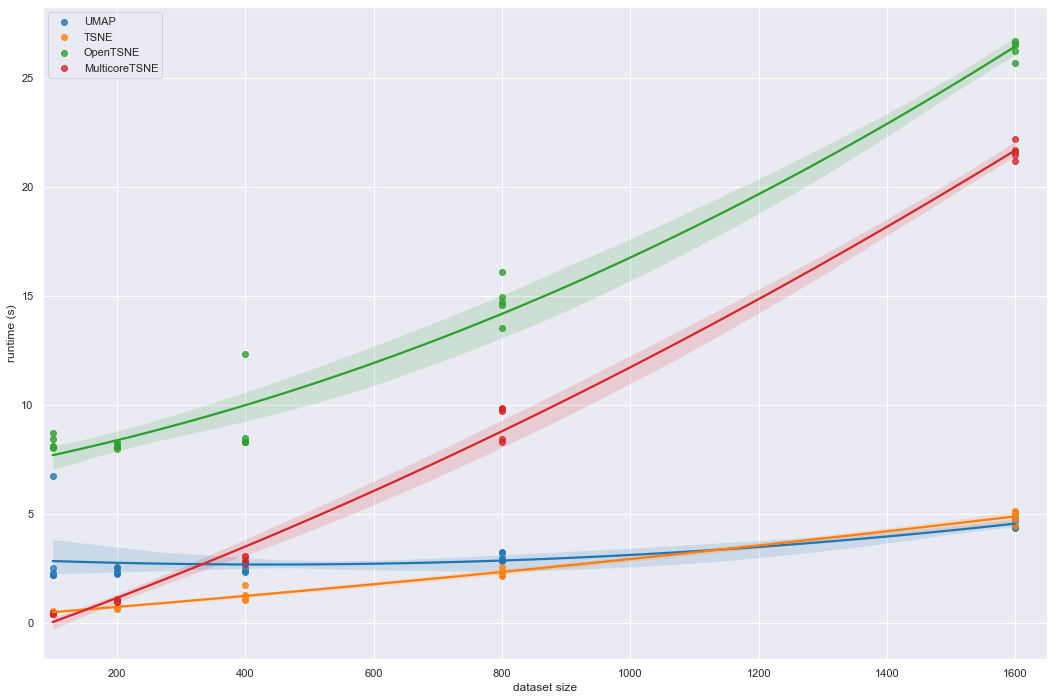

In [13]:
for alg_name, perf_data in performance_data.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2, label=alg_name)
plt.legend()
plt.xlim(85, 1650)
# plt.ylim(0, 10)

In [14]:
all_algorithms = [OpenTSNE(n_jobs=-1, negative_gradient_method='bh'), UMAP(), TSNE(), MulticoreTSNE()]
performance_data_2 = {}
for algos in all_algorithms:
    if 'openTSNE' in str(algos.__class__):
        alg_name = 'OpenTSNE'
    elif 'MulticoreTSNE' in str(algos.__class__):
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = str(algos).split('(')[0]
    performance_data[alg_name] = data_size_scaling(algos, mnist_data, n_runs=5)

    print(f"[{time.asctime(time.localtime())}] Completed {alg_name}")


[Fri Apr  9 00:09:20 2021] Completed OpenTSNE
[Fri Apr  9 00:10:32 2021] Completed UMAP
[Fri Apr  9 00:11:11 2021] Completed TSNE
[Fri Apr  9 00:14:08 2021] Completed MulticoreTSNE


(90.0, 1610.0)

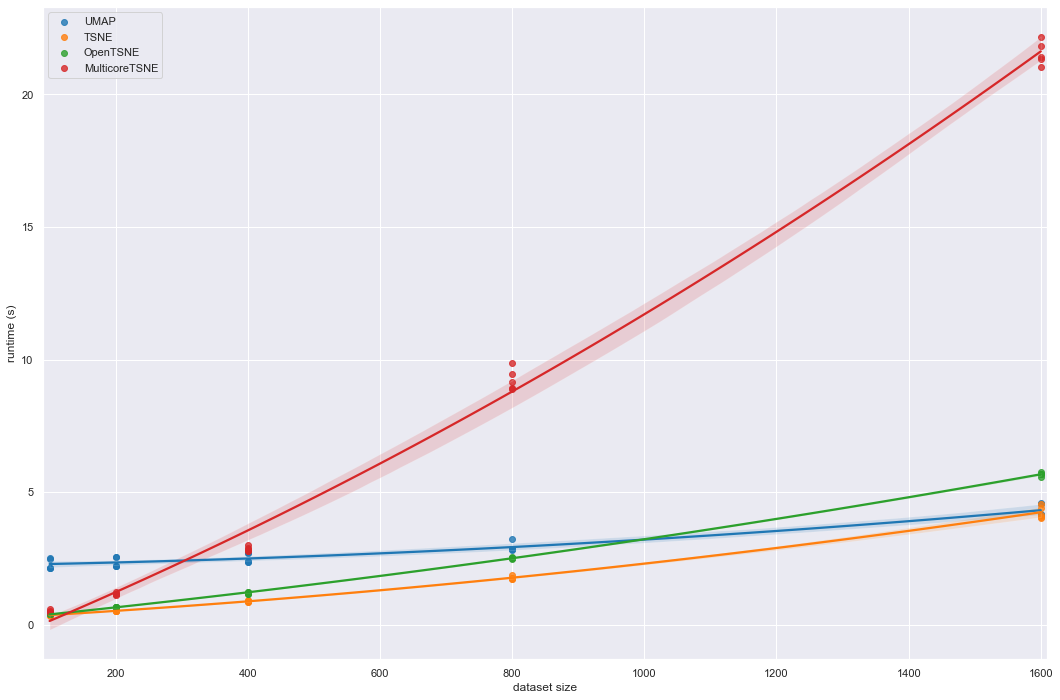

In [17]:
for alg_name, perf_data in performance_data.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2, label=alg_name)
plt.legend()
plt.xlim(90,1610)

In [18]:
all_algorithms = [OpenTSNE(n_jobs=-1, negative_gradient_method='bh'), UMAP(), TSNE(), MulticoreTSNE()]
performance_data_2 = {}
for algos in all_algorithms:
    if 'openTSNE' in str(algos.__class__):
        alg_name = 'OpenTSNE'
    elif 'MulticoreTSNE' in str(algos.__class__):
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = str(algos).split('(')[0]
    performance_data_2[alg_name] = data_size_scaling(algos, mnist_data, sizes=[1600,3200,6400,12800,25600], n_runs=4)

    print(f"[{time.asctime(time.localtime())}] Completed {alg_name}")

[Fri Apr  9 00:31:28 2021] Completed OpenTSNE
[Fri Apr  9 00:42:48 2021] Completed UMAP
[Fri Apr  9 00:53:44 2021] Completed TSNE
[Fri Apr  9 01:42:42 2021] Completed MulticoreTSNE


(1400.0, 25700.0)

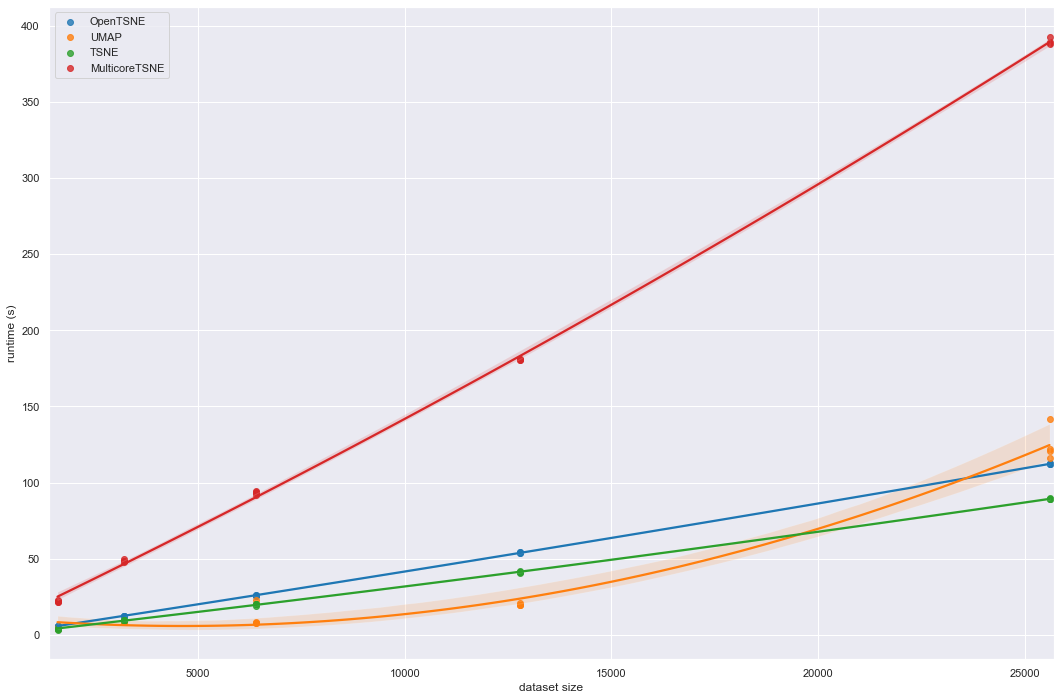

In [21]:
for alg_name, perf_data in performance_data_2.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2, label=alg_name)
plt.legend()
plt.xlim(1400,25700)

In [22]:
all_algorithms = [OpenTSNE(), UMAP(), TSNE(), MulticoreTSNE()]
performance_data_3 = {}
for algos in all_algorithms:
    if 'openTSNE' in str(algos.__class__):
        alg_name = 'OpenTSNE'
    elif 'MulticoreTSNE' in str(algos.__class__):
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = str(algos).split('(')[0]
    performance_data_3[alg_name] = data_size_scaling(algos, mnist_data, sizes=[1600,3200,6400,12800,25600], n_runs=4)

    print(f"[{time.asctime(time.localtime())}] Completed {alg_name}")

[Fri Apr  9 09:22:25 2021] Completed OpenTSNE
[Fri Apr  9 09:34:21 2021] Completed UMAP
[Fri Apr  9 09:46:56 2021] Completed TSNE


KeyboardInterrupt: 

(1400.0, 25700.0)

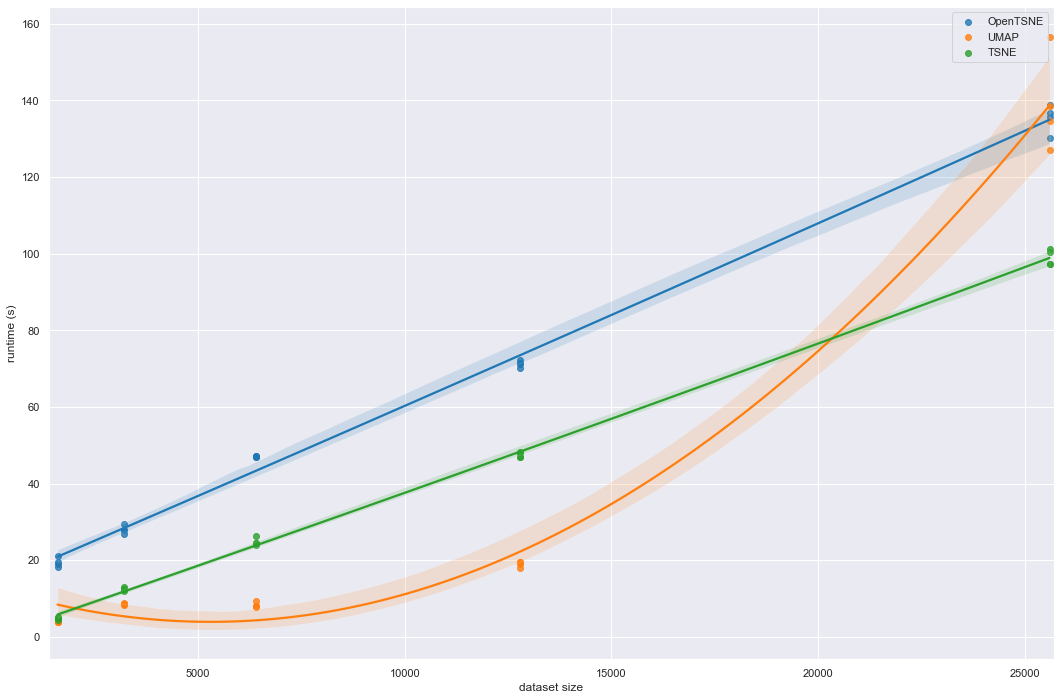

In [23]:
for alg_name, perf_data in performance_data_3.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2, label=alg_name)
plt.legend()
plt.xlim(1400,25700)

In [24]:
all_algorithms = [OpenTSNE(n_jobs=-1, negative_gradient_method='bh'), UMAP(), TSNE(), MulticoreTSNE()]
performance_data_4 = {}
for algos in all_algorithms:
    if 'openTSNE' in str(algos.__class__):
        alg_name = 'OpenTSNE'
    elif 'MulticoreTSNE' in str(algos.__class__):
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = str(algos).split('(')[0]
    performance_data_4[alg_name] = data_size_scaling(algos, mnist_data, sizes=[25600,52000,104000], n_runs=1)

    print(f"[{time.asctime(time.localtime())}] Completed {alg_name}")

[Fri Apr  9 10:44:22 2021] Completed OpenTSNE
[Fri Apr  9 11:29:09 2021] Completed UMAP
[Fri Apr  9 11:46:01 2021] Completed TSNE
[Fri Apr  9 12:37:52 2021] Completed MulticoreTSNE


(20000.0, 110000.0)

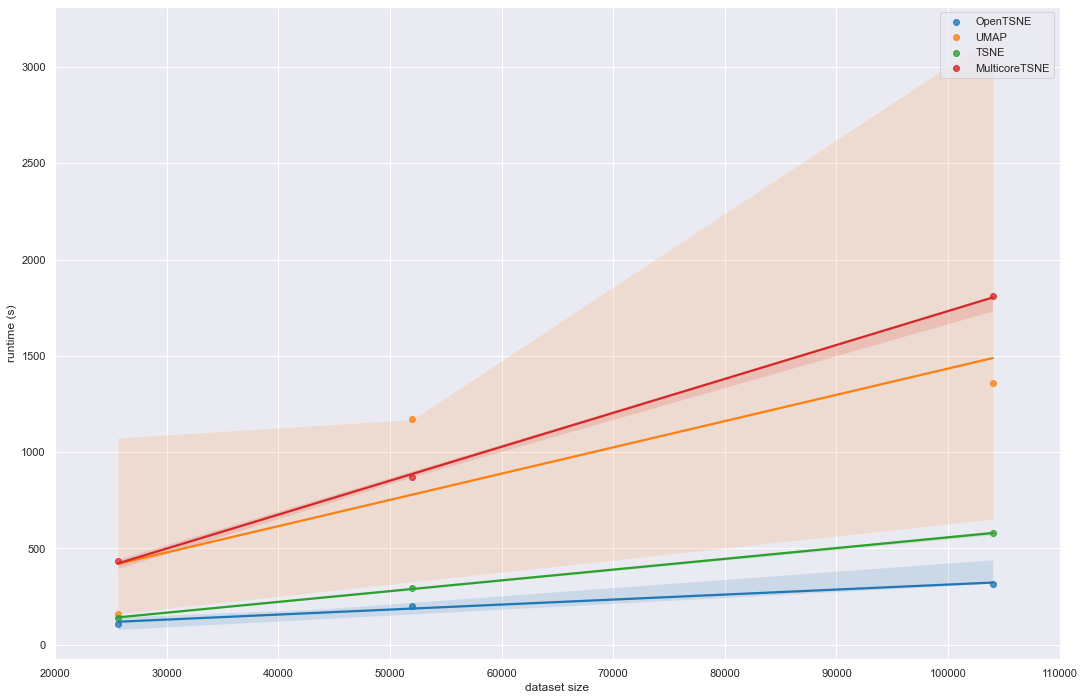

In [28]:
for alg_name, perf_data in performance_data_4.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, label=alg_name)
plt.legend()
plt.xlim(20000,110000)